In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [2]:
### 동대문구 내 따릉이 대여소 정보

Bike_Stop = pd.read_excel('./raw data/대여소/서울특별시 공공자전거 대여소 정보(19.12.9).xlsx')
Bike_Stop_ID = Bike_Stop.groupby('대여소_구')['대여소ID'].unique().loc['동대문구']
#Bike_Stop_ID = np.append(Bike_Stop_ID, 664)
Bike_Stop_ID = Bike_Stop_ID.astype(np.int64)
Bike_Stop_ID

array([600, 601, 602, 604, 605, 606, 607, 608, 609, 610, 612, 613, 614,
       615, 616, 617, 621, 622, 623, 624, 625, 626, 627, 628, 630, 631,
       633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 646, 647,
       648, 650, 651, 652, 654, 656, 657, 658, 659, 660, 661, 663],
      dtype=int64)

In [24]:
### 동대문구 Inflow & Outflow 정보 불러오기

import os
dirs = os.getcwd() + '/pickled data/1111_ML/'
files = os.listdir(dirs)
files = [file for file in files if 'final' in file]
files

['동대문구 대여정보_Inflow_final.pkl', '동대문구 대여정보_Outflow_final.pkl']

In [25]:
Bike_Inflow = pd.read_pickle(dirs+files[0])
Bike_Inflow

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,612,20,2019,1,1,1,0,-5.5,NaN,1.0,54.0
1,648,15,2019,1,1,1,0,-5.5,NaN,1.0,54.0
2,660,10,2019,1,1,1,0,-5.5,NaN,1.0,54.0
3,659,15,2019,1,1,1,0,-5.5,NaN,1.0,54.0
4,623,20,2019,1,1,1,0,-5.5,NaN,1.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
761005,630,15,2020,6,30,1,23,18.7,0.0,3.3,87.0
761006,607,10,2020,6,30,1,23,18.7,0.0,3.3,87.0
761007,636,9,2020,6,30,1,23,18.7,0.0,3.3,87.0
761008,663,10,2020,6,30,1,23,18.7,0.0,3.3,87.0


In [26]:
Bike_Outflow = pd.read_pickle(dirs+files[1])
Bike_Outflow

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,646,10,2019,1,1,1,0,-5.5,NaN,1.0,54.0
1,624,10,2019,1,1,1,0,-5.5,NaN,1.0,54.0
2,615,20,2019,1,1,1,0,-5.5,NaN,1.0,54.0
3,640,6,2019,1,1,1,0,-5.5,NaN,1.0,54.0
4,613,10,2019,1,1,1,0,-5.5,NaN,1.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
745582,623,20,2020,6,30,1,23,18.7,0.0,3.3,87.0
745583,660,10,2020,6,30,1,23,18.7,0.0,3.3,87.0
745584,641,10,2020,6,30,1,23,18.7,0.0,3.3,87.0
745585,627,10,2020,6,30,1,23,18.7,0.0,3.3,87.0


In [27]:
### 대여소 단위로 데이터 프레임 만들기

Bike_Inflow['반납대여소ID'].value_counts()

602    43093
646    34112
634    31514
650    26492
631    25365
648    24605
633    22555
613    21642
641    21253
614    20568
625    19892
609    19471
635    19248
623    19157
630    19041
624    18948
612    18452
627    17319
622    16717
660    16462
663    15958
659    15952
643    15851
642    15143
639    15027
661    14979
657    12744
617    12562
605    12278
626    12264
637    11734
658    11496
615    11417
638    10698
647    10383
651    10011
636     9735
607     9509
604     9122
640     8775
601     8569
606     8468
656     7565
610     7284
654     5978
652     5289
628     4940
621     3625
608     3593
600     1745
616     1494
664      916
Name: 반납대여소ID, dtype: int64

In [28]:
Bike_Outflow['대여대여소ID'].value_counts()

602    35426
634    31306
646    30520
623    28926
650    27177
631    25327
648    23293
614    23013
613    21114
641    20946
633    20859
609    20676
635    19660
630    18987
612    18018
639    17878
625    17813
659    16909
660    16366
624    15839
627    15833
642    15219
663    15177
661    14755
622    13908
637    13236
643    13220
605    11940
615    11789
657    11783
626    11702
617    11359
651    10292
658    10255
638     9473
647     8856
601     8596
636     8558
604     8380
640     8086
607     8077
610     7717
606     7466
656     7219
654     6711
628     5169
652     5030
616     4933
621     4441
608     3353
600     2091
664      910
Name: 대여대여소ID, dtype: int64

In [29]:
### 반납건수, 대여건수 column 추가

Bike_Inflow['반납건수'] = 1
Bike_Inflow = Bike_Inflow.replace(np.nan, 0)
Bike_Inflow

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),반납건수
0,612,20,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
1,648,15,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
2,660,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
3,659,15,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
4,623,20,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
761005,630,15,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
761006,607,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
761007,636,9,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
761008,663,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1


In [30]:
Bike_Outflow['대여건수'] = 1
Bike_Outflow = Bike_Outflow.replace(np.nan, 0)
Bike_Outflow

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),대여건수
0,646,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
1,624,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
2,615,20,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
3,640,6,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
4,613,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
745582,623,20,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
745583,660,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
745584,641,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
745585,627,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1


#### 가장 이용량이 많았던 602번 대여소에 관한 분석 내용은 3차분석 참고

### 데이터 수정
- 664번 대여소 삭제
- 05~22시
- inflow + outflow

In [31]:
# 664번 대여소 삭제 (Inflow)
idx_664 = Bike_Inflow[Bike_Inflow['반납대여소ID'] == 664].index
Bike_Inflow = Bike_Inflow.drop(idx_664).copy()
Bike_Inflow

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),반납건수
0,612,20,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
1,648,15,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
2,660,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
3,659,15,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
4,623,20,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
761005,630,15,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
761006,607,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
761007,636,9,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
761008,663,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1


In [32]:
# 664번 대여소 삭제 (Outflow)
idx_664_o= Bike_Outflow[Bike_Outflow['대여대여소ID'] == 664].index
Bike_Outflow = Bike_Outflow.drop(idx_664_o).copy()
Bike_Outflow

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),대여건수
0,646,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
1,624,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
2,615,20,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
3,640,6,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
4,613,10,2019,1,1,1,0,-5.5,0.0,1.0,54.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
745582,623,20,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
745583,660,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
745584,641,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1
745585,627,10,2020,6,30,1,23,18.7,0.0,3.3,87.0,1


In [33]:
# 시간 = 0 ~ 4 & 22 ~ 23 지우기 (Inflow)
idx_night_i = Bike_Inflow[(Bike_Inflow['시간'] <= 4) & (Bike_Inflow['시간'] >= 0)].index
Bike_Inflow = Bike_Inflow.drop(idx_night_i).copy()
idx_night_i = Bike_Inflow[(Bike_Inflow['시간'] == 23) | (Bike_Inflow['시간'] == 22)].index
Bike_Inflow = Bike_Inflow.drop(idx_night_i).reset_index(drop=True).copy()
Bike_Inflow

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),반납건수
0,617,20,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
1,631,15,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
2,602,10,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
3,642,7,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
4,622,15,2019,1,1,1,6,-7.9,0.0,1.3,60.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
562963,627,10,2020,6,30,1,21,18.9,0.5,2.5,84.0,1
562964,602,10,2020,6,30,1,21,18.9,0.5,2.5,84.0,1
562965,625,9,2020,6,30,1,21,18.9,0.5,2.5,84.0,1
562966,602,10,2020,6,30,1,21,18.9,0.5,2.5,84.0,1


In [34]:
# 시간 = 0 ~ 4 & 22 ~ 23 지우기 (Outflow)
idx_night_o = Bike_Outflow[(Bike_Outflow['시간'] <= 4) & (Bike_Outflow['시간'] >= 0)].index
Bike_Outflow = Bike_Outflow.drop(idx_night_o).copy()
idx_night_o = Bike_Outflow[(Bike_Outflow['시간'] == 23) | (Bike_Outflow['시간'] == 22)].index
Bike_Outflow = Bike_Outflow.drop(idx_night_o).reset_index(drop=True).copy()
Bike_Outflow

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),대여건수
0,634,20,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
1,614,20,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
2,602,10,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
3,601,10,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
4,643,10,2019,1,1,1,5,-7.6,0.0,2.1,59.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
590508,613,10,2020,6,30,1,21,18.9,0.5,2.5,84.0,1
590509,646,10,2020,6,30,1,21,18.9,0.5,2.5,84.0,1
590510,602,10,2020,6,30,1,21,18.9,0.5,2.5,84.0,1
590511,627,10,2020,6,30,1,21,18.9,0.5,2.5,84.0,1


### 날씨 데이터 바꾸기

In [38]:
weather = pd.read_csv('raw data/기상관측/서울특별시_기상관측_20190101_20200630_일별.csv', encoding='cp949')
weather

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 상대습도(%)
0,108,서울,2019-01-01,-5.0,-8.2,-0.6,NaN,4.3,49.5
1,108,서울,2019-01-02,-4.9,-8.8,0.2,NaN,3.6,42.8
2,108,서울,2019-01-03,-3.5,-8.4,3.2,NaN,2.9,38.8
3,108,서울,2019-01-04,-1.1,-6.2,4.1,NaN,3.0,55.5
4,108,서울,2019-01-05,-2.8,-5.5,1.1,NaN,4.3,40.3
...,...,...,...,...,...,...,...,...,...
542,108,서울,2020-06-26,21.8,19.2,25.7,2.1,5.3,82.1
543,108,서울,2020-06-27,24.1,20.4,29.6,0.0,5.4,70.4
544,108,서울,2020-06-28,25.2,21.5,30.1,NaN,4.7,70.5
545,108,서울,2020-06-29,23.8,20.6,26.5,11.9,5.9,77.0


In [39]:
weather['일시'] = weather['일시'].astype('datetime64[ns]') 
weather['연도'] = weather['일시'].dt.year 
weather['월'] = weather['일시'].dt.month 
weather['일'] = weather['일시'].dt.day 
#weather['시간'] = weather['일시'].dt.hour
del weather['지점']
del weather['지점명']
del weather['일시']
del weather['평균기온(°C)']
weather

,최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 상대습도(%),연도,월,일
0,-8.2,-0.6,NaN,4.3,49.5,2019,1,1
1,-8.8,0.2,NaN,3.6,42.8,2019,1,2
2,-8.4,3.2,NaN,2.9,38.8,2019,1,3
3,-6.2,4.1,NaN,3.0,55.5,2019,1,4
4,-5.5,1.1,NaN,4.3,40.3,2019,1,5
...,...,...,...,...,...,...,...,...
542,19.2,25.7,2.1,5.3,82.1,2020,6,26
543,20.4,29.6,0.0,5.4,70.4,2020,6,27
544,21.5,30.1,NaN,4.7,70.5,2020,6,28
545,20.6,26.5,11.9,5.9,77.0,2020,6,29


In [40]:
del Bike_Inflow['기온(°C)']
del Bike_Inflow['강수량(mm)']
del Bike_Inflow['풍속(m/s)']
del Bike_Inflow['습도(%)']
Bike_Inflow

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,반납건수
0,617,20,2019,1,1,1,5,1
1,631,15,2019,1,1,1,5,1
2,602,10,2019,1,1,1,5,1
3,642,7,2019,1,1,1,5,1
4,622,15,2019,1,1,1,6,1
...,...,...,...,...,...,...,...,...
562963,627,10,2020,6,30,1,21,1
562964,602,10,2020,6,30,1,21,1
562965,625,9,2020,6,30,1,21,1
562966,602,10,2020,6,30,1,21,1


In [41]:
del Bike_Outflow['기온(°C)']
del Bike_Outflow['강수량(mm)']
del Bike_Outflow['풍속(m/s)']
del Bike_Outflow['습도(%)']
Bike_Outflow

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,대여건수
0,634,20,2019,1,1,1,5,1
1,614,20,2019,1,1,1,5,1
2,602,10,2019,1,1,1,5,1
3,601,10,2019,1,1,1,5,1
4,643,10,2019,1,1,1,5,1
...,...,...,...,...,...,...,...,...
590508,613,10,2020,6,30,1,21,1
590509,646,10,2020,6,30,1,21,1
590510,602,10,2020,6,30,1,21,1
590511,627,10,2020,6,30,1,21,1


In [42]:
Bike_Inflow = Bike_Inflow.merge(weather, on = ['연도', '월', '일']).copy()
Bike_Inflow

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,반납건수,최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 상대습도(%)
0,617,20,2019,1,1,1,5,1,-8.2,-0.6,NaN,4.3,49.5
1,631,15,2019,1,1,1,5,1,-8.2,-0.6,NaN,4.3,49.5
2,602,10,2019,1,1,1,5,1,-8.2,-0.6,NaN,4.3,49.5
3,642,7,2019,1,1,1,5,1,-8.2,-0.6,NaN,4.3,49.5
4,622,15,2019,1,1,1,6,1,-8.2,-0.6,NaN,4.3,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562963,627,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
562964,602,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
562965,625,9,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
562966,602,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0


In [43]:
Bike_Outflow = Bike_Outflow.merge(weather, on = ['연도', '월', '일']).copy()
Bike_Outflow

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,대여건수,최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 상대습도(%)
0,634,20,2019,1,1,1,5,1,-8.2,-0.6,NaN,4.3,49.5
1,614,20,2019,1,1,1,5,1,-8.2,-0.6,NaN,4.3,49.5
2,602,10,2019,1,1,1,5,1,-8.2,-0.6,NaN,4.3,49.5
3,601,10,2019,1,1,1,5,1,-8.2,-0.6,NaN,4.3,49.5
4,643,10,2019,1,1,1,5,1,-8.2,-0.6,NaN,4.3,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590508,613,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
590509,646,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
590510,602,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
590511,627,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0


In [45]:
Bike_Inflow = Bike_Inflow.replace(np.nan, 0)
Bike_Inflow

,반납대여소ID,반납대여소거치대수,연도,월,일,요일,시간,반납건수,최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 상대습도(%)
0,617,20,2019,1,1,1,5,1,-8.2,-0.6,0.0,4.3,49.5
1,631,15,2019,1,1,1,5,1,-8.2,-0.6,0.0,4.3,49.5
2,602,10,2019,1,1,1,5,1,-8.2,-0.6,0.0,4.3,49.5
3,642,7,2019,1,1,1,5,1,-8.2,-0.6,0.0,4.3,49.5
4,622,15,2019,1,1,1,6,1,-8.2,-0.6,0.0,4.3,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562963,627,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
562964,602,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
562965,625,9,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
562966,602,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0


In [47]:
Bike_Outflow = Bike_Outflow.replace(np.nan, 0)
Bike_Outflow

,대여대여소ID,대여대여소거치대수,연도,월,일,요일,시간,대여건수,최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 상대습도(%)
0,634,20,2019,1,1,1,5,1,-8.2,-0.6,0.0,4.3,49.5
1,614,20,2019,1,1,1,5,1,-8.2,-0.6,0.0,4.3,49.5
2,602,10,2019,1,1,1,5,1,-8.2,-0.6,0.0,4.3,49.5
3,601,10,2019,1,1,1,5,1,-8.2,-0.6,0.0,4.3,49.5
4,643,10,2019,1,1,1,5,1,-8.2,-0.6,0.0,4.3,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590508,613,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
590509,646,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
590510,602,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0
590511,627,10,2020,6,30,1,21,1,18.4,23.1,64.7,7.6,83.0


### xgboost

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint

n = 3

In [51]:
dayofweek = ["요일_"+str(i) for i in range(7)]
features = ['월', '시간', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 풍속(m/s)', '평균 상대습도(%)'] + dayofweek
features

['월',
 '시간',
 '최저기온(°C)',
 '최고기온(°C)',
 '일강수량(mm)',
 '최대 풍속(m/s)',
 '평균 상대습도(%)',
 '요일_0',
 '요일_1',
 '요일_2',
 '요일_3',
 '요일_4',
 '요일_5',
 '요일_6']

### Inflow

In [52]:
cols = ['월', '요일', '시간', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 풍속(m/s)', '평균 상대습도(%)']

Result_Inflow = {}
total = Bike_Inflow['반납대여소ID'].nunique()

for idx, (name, df) in enumerate(Bike_Inflow.groupby('반납대여소ID'), 1):
    print("[%d/%d] %s" %(idx, total, name), end=' ')
    
    try:
        df = df.groupby(cols)['반납건수'].sum().reset_index()
        df = df.join(pd.get_dummies(df['요일'], prefix="요일"))

        print(df.shape)

        x_train, x_test, y_train, y_test = train_test_split(df[features], df['반납건수'], test_size=0.2, random_state=42)

        param_grid = {
            "gamma": uniform(0, 0.5).rvs(n),
            "max_depth": range(2, 7), # default 3
            "n_estimators": randint(100, 150).rvs(n), # default 100
        }

        grid = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), cv=5, n_jobs=-1, param_grid=param_grid)
        grid = grid.fit(x_train, y_train)

        model = grid.best_estimator_
        predictions = model.predict(x_test)
        mae = mean_absolute_error(y_test, predictions)

        Result_Inflow[str(name)] = {}
        Result_Inflow[str(name)]['model'] = model
        Result_Inflow[str(name)]['mae'] = mae
        Result_Inflow[str(name)]['errors'] = predictions - y_test
        
    except:
        continue

[1/51] 600 (1014, 16)
[2/51] 601 (3812, 16)
[3/51] 602 (6284, 16)
[4/51] 604 (3135, 16)
[5/51] 605 (4401, 16)
[6/51] 606 (3129, 16)
[7/51] 607 (3052, 16)
[8/51] 608 (1927, 16)
[9/51] 609 (4984, 16)
[10/51] 610 (3133, 16)
[11/51] 612 (5040, 16)
[12/51] 613 (5847, 16)
[13/51] 614 (5283, 16)
[14/51] 615 (3938, 16)
[15/51] 616 (981, 16)
[16/51] 617 (3732, 16)
[17/51] 621 (1851, 16)
[18/51] 622 (4859, 16)
[19/51] 623 (4938, 16)
[20/51] 624 (5148, 16)
[21/51] 625 (4853, 16)
[22/51] 626 (4100, 16)
[23/51] 627 (4715, 16)
[24/51] 628 (2355, 16)
[25/51] 630 (5095, 16)
[26/51] 631 (5791, 16)
[27/51] 633 (5650, 16)
[28/51] 634 (5771, 16)
[29/51] 635 (4696, 16)
[30/51] 636 (3445, 16)
[31/51] 637 (4245, 16)
[32/51] 638 (3934, 16)
[33/51] 639 (4692, 16)
[34/51] 640 (3657, 16)
[35/51] 641 (5091, 16)
[36/51] 642 (4576, 16)
[37/51] 643 (4217, 16)
[38/51] 646 (6328, 16)
[39/51] 647 (3274, 16)
[40/51] 648 (5272, 16)
[41/51] 650 (5005, 16)
[42/51] 651 (3782, 16)
[43/51] 652 (2104, 16)
[44/51] 654 (2562, 16

In [53]:
errors = np.array([result['mae'] for result in Result_Inflow.values()])
errors.mean()

1.0110311263420817

In [54]:
Result_Inflow

{'600': {'model': XGBRegressor(gamma=0.2622305330429327, max_depth=2, n_estimators=137,
               objective='reg:squarederror'),
  'mae': 0.3827169534608061,
  'errors': 752    0.372642
  519    0.116052
  210   -0.842337
  611    0.250422
  914    0.234762
           ...   
  370    0.323553
  381   -0.663224
  780    0.310665
  760    0.114877
  682   -0.612129
  Name: 반납건수, Length: 203, dtype: float64},
 '601': {'model': XGBRegressor(gamma=0.22362503235822068, max_depth=2, n_estimators=117,
               objective='reg:squarederror'),
  'mae': 0.7460493632100357,
  'errors': 2979   -0.961185
  2522    0.598495
  599     0.428826
  3484   -3.345832
  1161    0.351952
            ...   
  818    -0.055900
  700     0.771756
  2307   -0.278514
  644     0.565458
  2889   -1.341797
  Name: 반납건수, Length: 763, dtype: float64},
 '602': {'model': XGBRegressor(gamma=0.24389735591831602, max_depth=6, n_estimators=104,
               objective='reg:squarederror'),
  'mae': 1.765892463443

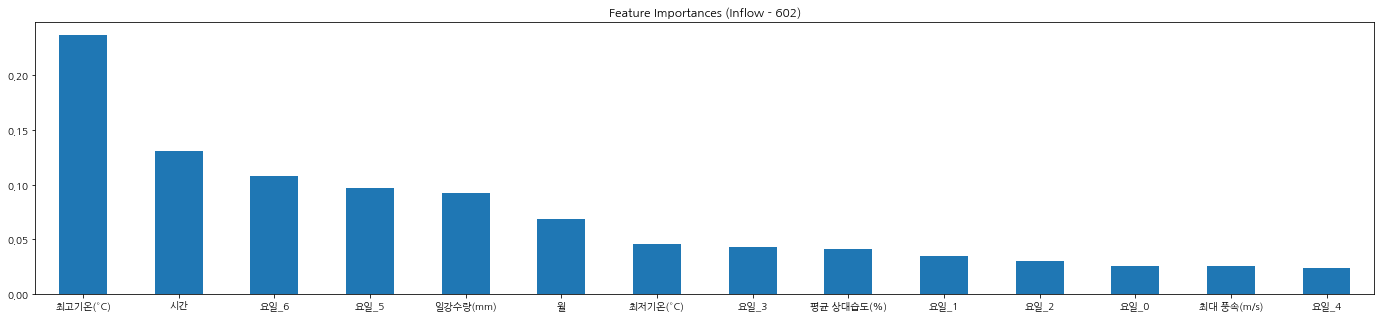

In [55]:
feature_importance_inflow_602 = pd.Series(index=features, data=Result_Inflow['602']['model'].feature_importances_).sort_values(ascending=False) 
feature_importance_inflow_602.plot(kind='bar', figsize=(24, 5), title="Feature Importances (Inflow - 602)", rot=0) 
plt.show()

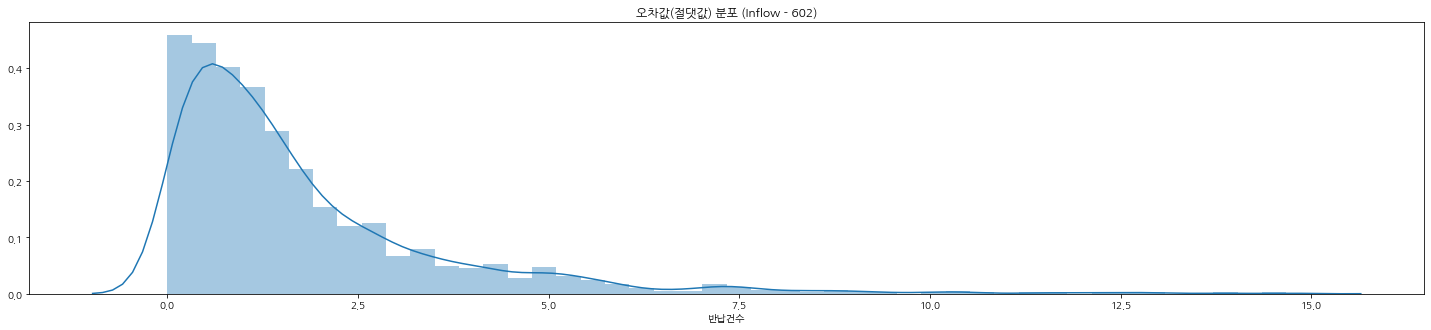

In [56]:
plt.figure(figsize=(25, 5)) 
sns.distplot(abs(Result_Inflow['602']['errors'])) 
plt.title("오차값(절댓값) 분포 (Inflow - 602)") 
plt.show()

### Outflow

In [57]:
Result_Outflow = {}
total = Bike_Outflow['대여대여소ID'].nunique()

for idx, (name, df) in enumerate(Bike_Outflow.groupby('대여대여소ID'), 1):
    print("[%d/%d] %s" %(idx, total, name), end=' ')
    
    try:
        df = df.groupby(cols)['대여건수'].sum().reset_index()
        df = df.join(pd.get_dummies(df['요일'], prefix="요일"))

        print(df.shape)

        x_train, x_test, y_train, y_test = train_test_split(df[features], df['대여건수'], test_size=0.2, random_state=42)

        param_grid = {
            "gamma": uniform(0, 0.5).rvs(n),
            "max_depth": range(2, 7), # default 3
            "n_estimators": randint(100, 150).rvs(n), # default 100
        }

        grid = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), cv=5, n_jobs=-1, param_grid=param_grid)
        grid = grid.fit(x_train, y_train)

        model = grid.best_estimator_
        predictions = model.predict(x_test)
        mae = mean_absolute_error(y_test, predictions)

        Result_Outflow[str(name)] = {}
        Result_Outflow[str(name)]['model'] = model
        Result_Outflow[str(name)]['mae'] = mae
        Result_Outflow[str(name)]['errors'] = predictions - y_test
        
    except:
        continue

[1/51] 600 (1223, 16)
[2/51] 601 (3895, 16)
[3/51] 602 (5928, 16)
[4/51] 604 (3693, 16)
[5/51] 605 (4415, 16)
[6/51] 606 (3287, 16)
[7/51] 607 (3213, 16)
[8/51] 608 (1839, 16)
[9/51] 609 (5367, 16)
[10/51] 610 (3622, 16)
[11/51] 612 (5387, 16)
[12/51] 613 (5498, 16)
[13/51] 614 (5491, 16)
[14/51] 615 (4426, 16)
[15/51] 616 (2130, 16)
[16/51] 617 (4070, 16)
[17/51] 621 (2400, 16)
[18/51] 622 (4608, 16)
[19/51] 623 (5532, 16)
[20/51] 624 (4955, 16)
[21/51] 625 (5040, 16)
[22/51] 626 (4188, 16)
[23/51] 627 (4530, 16)
[24/51] 628 (2666, 16)
[25/51] 630 (5413, 16)
[26/51] 631 (5669, 16)
[27/51] 633 (5142, 16)
[28/51] 634 (5688, 16)
[29/51] 635 (4846, 16)
[30/51] 636 (3513, 16)
[31/51] 637 (4687, 16)
[32/51] 638 (3302, 16)
[33/51] 639 (5064, 16)
[34/51] 640 (3544, 16)
[35/51] 641 (5032, 16)
[36/51] 642 (4751, 16)
[37/51] 643 (4420, 16)
[38/51] 646 (6018, 16)
[39/51] 647 (3752, 16)
[40/51] 648 (5790, 16)
[41/51] 650 (5368, 16)
[42/51] 651 (3846, 16)
[43/51] 652 (2711, 16)
[44/51] 654 (3307, 1

In [58]:
errors = np.array([result['mae'] for result in Result_Outflow.values()])
errors.mean()

1.0802892975824931

In [59]:
Result_Outflow

{'600': {'model': XGBRegressor(gamma=0.21669064474598965, max_depth=2, n_estimators=102,
               objective='reg:squarederror'),
  'mae': 0.5548286138748636,
  'errors': 661     0.261868
  220    -0.673018
  155     0.435575
  677     0.470920
  910     0.655727
            ...   
  593     1.285442
  534     0.286124
  1216    0.162330
  481    -0.343245
  367     0.944992
  Name: 대여건수, Length: 245, dtype: float64},
 '601': {'model': XGBRegressor(gamma=0.3438757606880997, n_estimators=111,
               objective='reg:squarederror'),
  'mae': 0.8239470934531196,
  'errors': 3682    1.253247
  912    -0.439608
  321     0.266798
  2098    0.410098
  1480    0.875215
            ...   
  2969   -1.821416
  2382    1.008573
  802    -1.847768
  247     0.355245
  3182    0.757371
  Name: 대여건수, Length: 779, dtype: float64},
 '602': {'model': XGBRegressor(gamma=0.18529267470936117, max_depth=5, n_estimators=106,
               objective='reg:squarederror'),
  'mae': 1.56934992001591

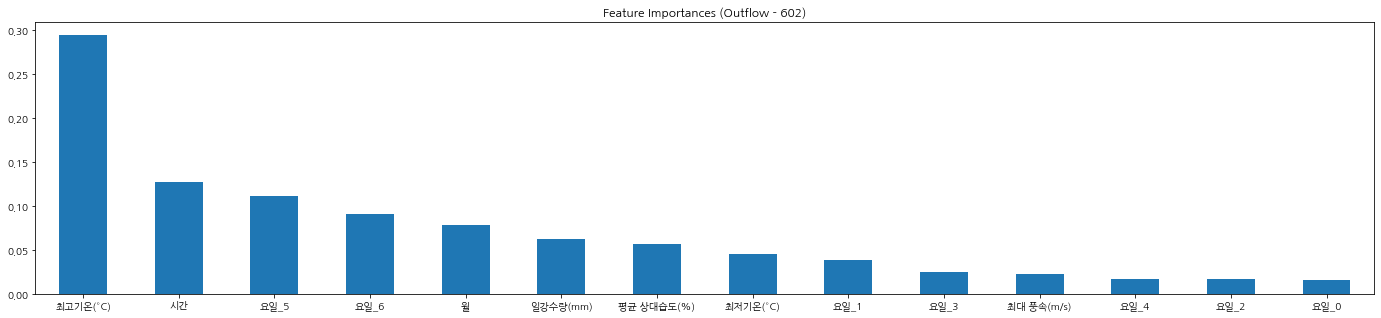

In [60]:
feature_importance_outflow_602 = pd.Series(index=features, data=Result_Outflow['602']['model'].feature_importances_).sort_values(ascending=False) 
feature_importance_outflow_602.plot(kind='bar', figsize=(24, 5), title="Feature Importances (Outflow - 602)", rot=0) 
plt.show()

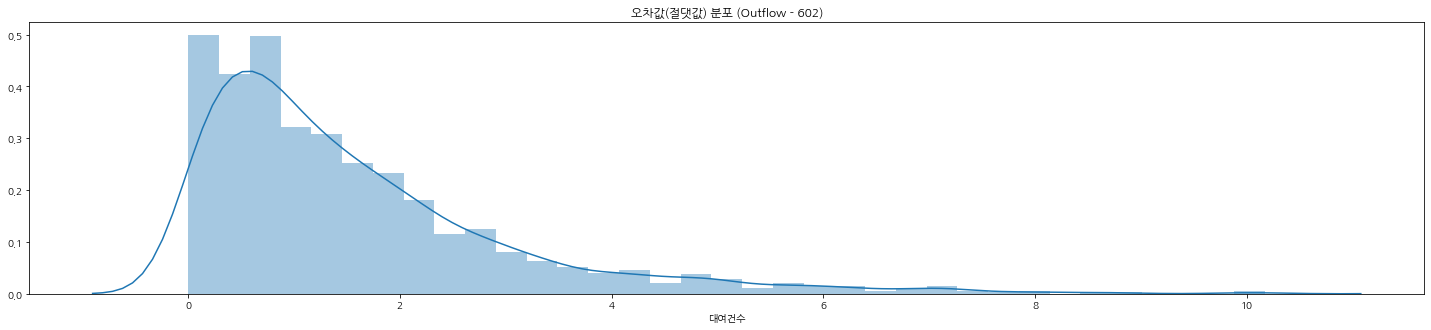

In [61]:
plt.figure(figsize=(25, 5)) 
sns.distplot(abs(Result_Outflow['602']['errors'])) 
plt.title("오차값(절댓값) 분포 (Outflow - 602)") 
plt.show()

### 저장

In [62]:
in_path = "./model/Inflow_bst/inflow_"
for result, id_stop in zip(Result_Inflow.values(), Bike_Stop_ID):
    result['model'].save_model(in_path+str(id_stop)+".bst")

In [63]:
out_path = "./model/Outflow_bst/outflow_"
for result, id_stop in zip(Result_Outflow.values(), Bike_Stop_ID):
    result['model'].save_model(out_path+str(id_stop)+".bst")

In [64]:
import pickle

in_pkl_path = "./model/Inflow/inflow_"
for result, id_stop in zip(Result_Inflow.values(), Bike_Stop_ID):
    pickle.dump(result['model'], open(in_pkl_path+str(id_stop)+".pkl", "wb"))


In [65]:
out_pkl_path = "./model/Outflow/outflow_"
for result, id_stop in zip(Result_Outflow.values(), Bike_Stop_ID):
    pickle.dump(result['model'], open(out_pkl_path+str(id_stop)+".pkl", "wb"))

### test

In [67]:
cols = ['월', '요일', '시간', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 풍속(m/s)', '평균 상대습도(%)']
temp = np.array([
    [5, 17, 10.0, 20.0, 0.0, 2.1, 30.0, 0, 1, 0, 0, 0, 0, 0],
    [12, 17, -10.0, -3.0, 0.0, 2.1, 30.0, 0, 0, 0, 0, 0, 1, 0],
    [8, 15, 20.0, 35.0, 30.0, 2.1, 60.0, 0, 1, 0, 0, 0, 0, 0],
])
tmp_df = pd.DataFrame(temp, columns = features)
#results['635']['model'].predict(pd.DataFrame(temp, columns = features))
Result_Inflow['602']['model'].predict(tmp_df)

array([6.8857775, 2.1993418, 5.0450497], dtype=float32)

In [68]:
Result_Outflow['602']['model'].predict(tmp_df)

array([8.58196 , 2.488435, 4.005014], dtype=float32)